In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
df = pd.read_csv('bank-additional-full.csv', delimiter = ';')

In [3]:
df.shape

(41188, 21)

In [4]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [7]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
month_rank_map = df.groupby('month')['y'].mean().sort_values(ascending = False).to_dict()
month_rank_map

{'mar': 0.5054945054945055,
 'dec': 0.489010989010989,
 'sep': 0.44912280701754387,
 'oct': 0.4387186629526462,
 'apr': 0.2047872340425532,
 'aug': 0.1060213661379087,
 'jun': 0.10511470477623167,
 'nov': 0.10143867349426969,
 'jul': 0.09046557011430165,
 'may': 0.06434744716391895}

In [9]:
df['month'] = df['month'].map(month_rank_map)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,0.064347,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,0.064347,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,0.064347,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,0.064347,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,0.064347,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [10]:
day_rank_map = df.groupby('day_of_week')['y'].mean().sort_values(ascending = False).to_dict()
day_rank_map

{'thu': 0.12118752174417256,
 'tue': 0.11779975278121137,
 'wed': 0.11667076469141874,
 'fri': 0.1080873898045228,
 'mon': 0.09948320413436693}

In [11]:
df['day_of_week'] = df['day_of_week'].map(day_rank_map)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [12]:
education_rank_map = df.groupby('education')['y'].mean().sort_values(ascending = False).to_dict()
education_rank_map

{'illiterate': 0.2222222222222222,
 'unknown': 0.14500288850375506,
 'university.degree': 0.13724523339907954,
 'professional.course': 0.11348464619492657,
 'high.school': 0.10835522858644246,
 'basic.4y': 0.1024904214559387,
 'basic.6y': 0.08202443280977312,
 'basic.9y': 0.0782464846980976}

In [13]:
df['education'] = df['education'].map(education_rank_map)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,0.102490,no,no,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,0.108355,unknown,no,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,0.108355,no,yes,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,0.082024,no,no,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,0.108355,no,no,yes,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [14]:
marital_rank_map = df.groupby('marital')['y'].mean().sort_values(ascending = False).to_dict()
marital_rank_map

{'unknown': 0.15,
 'single': 0.1400414937759336,
 'divorced': 0.10320901994796183,
 'married': 0.10157252888318356}

In [15]:
df['marital'] = df['marital'].map(marital_rank_map)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,0.101573,0.102490,no,no,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,0.101573,0.108355,unknown,no,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,0.101573,0.108355,no,yes,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,0.101573,0.082024,no,no,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,0.101573,0.108355,no,no,yes,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [16]:
job_rank_map = df.groupby('job')['y'].mean().sort_values(ascending = False).to_dict()
job_rank_map

{'student': 0.3142857142857143,
 'retired': 0.25232558139534883,
 'unemployed': 0.14201183431952663,
 'admin.': 0.12972558050278257,
 'management': 0.1121751025991792,
 'unknown': 0.11212121212121212,
 'technician': 0.10826041821147857,
 'self-employed': 0.10485573539760731,
 'housemaid': 0.1,
 'entrepreneur': 0.08516483516483517,
 'services': 0.08138070042831948,
 'blue-collar': 0.06894315971471796}

In [17]:
df['job'] = df['job'].map(job_rank_map)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.100000,0.101573,0.102490,no,no,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.081381,0.101573,0.108355,unknown,no,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0.081381,0.101573,0.108355,no,yes,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.129726,0.101573,0.082024,no,no,no,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.081381,0.101573,0.108355,no,no,yes,telephone,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [18]:
contact_rank_map = df.groupby('contact')['y'].mean().sort_values(ascending = False).to_dict()
contact_rank_map

{'cellular': 0.14737607099143207, 'telephone': 0.05231321457059293}

In [19]:
df['contact'] = df['contact'].map(contact_rank_map)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.100000,0.101573,0.102490,no,no,no,0.052313,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.081381,0.101573,0.108355,unknown,no,no,0.052313,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0.081381,0.101573,0.108355,no,yes,no,0.052313,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.129726,0.101573,0.082024,no,no,no,0.052313,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.081381,0.101573,0.108355,no,no,yes,0.052313,0.064347,0.099483,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [20]:
class ThreeWayEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X = np.array(X.ravel())
        for i in range(len(X)):
            if X[i] == 'no' or X[i] == 'failure':
                X[i] = 0
            elif X[i] == 'yes' or X[i] == 'success':
                X[i] = 1
            elif X[i] == 'unknown' or X[i] == 'nonexistent':
                X[i] = -1
        return X.reshape(-1, 1).astype('int32')

In [21]:
default_enc = ThreeWayEncoder()
housing_enc = ThreeWayEncoder()
loan_enc = ThreeWayEncoder()
poutcome_enc = ThreeWayEncoder()

df['default'] = default_enc.fit_transform(df['default'])
df['housing'] = housing_enc.fit_transform(df['housing'])
df['loan'] = loan_enc.fit_transform(df['loan'])
df['poutcome'] = poutcome_enc.fit_transform(df['poutcome'])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.100000,0.101573,0.102490,0,0,0,0.052313,0.064347,0.099483,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.081381,0.101573,0.108355,-1,0,0,0.052313,0.064347,0.099483,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0.081381,0.101573,0.108355,0,1,0,0.052313,0.064347,0.099483,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.129726,0.101573,0.082024,0,0,0,0.052313,0.064347,0.099483,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.081381,0.101573,0.108355,0,0,1,0.052313,0.064347,0.099483,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null float64
marital           41188 non-null float64
education         41188 non-null float64
default           41188 non-null int32
housing           41188 non-null int32
loan              41188 non-null int32
contact           41188 non-null float64
month             41188 non-null float64
day_of_week       41188 non-null float64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int32
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(11), int32(4), int64(6)
memory usa

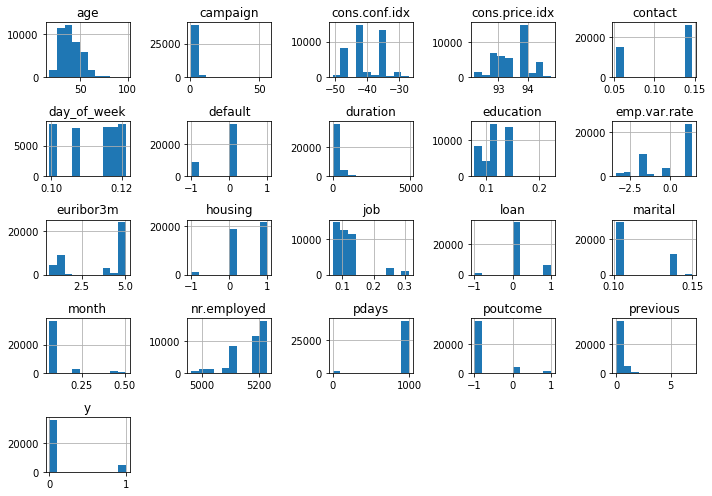

In [23]:
df.hist(figsize = (10, 7))
plt.tight_layout()

In [24]:
from pandas.plotting import scatter_matrix

In [25]:
core_mat = df.corr()['y'].sort_values(ascending = False)
core_mat

y                 1.000000
duration          0.405274
month             0.274395
poutcome          0.270373
previous          0.230181
job               0.152768
contact           0.144773
default           0.099199
education         0.068472
cons.conf.idx     0.054878
marital           0.054570
age               0.030399
day_of_week       0.025195
housing           0.011379
loan             -0.003142
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64

In [26]:
df.drop('loan', axis = 1, inplace = True)
df.head()

,age,job,marital,education,default,housing,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.100000,0.101573,0.102490,0,0,0.052313,0.064347,0.099483,261,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.081381,0.101573,0.108355,-1,0,0.052313,0.064347,0.099483,149,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0.081381,0.101573,0.108355,0,1,0.052313,0.064347,0.099483,226,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.129726,0.101573,0.082024,0,0,0.052313,0.064347,0.099483,151,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.081381,0.101573,0.108355,0,0,0.052313,0.064347,0.099483,307,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0


In [27]:
X = df.drop('y', axis = 1)
y = df['y'].copy()

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve
from IPython.display import display, Markdown

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
score_board = {'clf': [], 'accuracy': [], 'recall': [], 'precision': [], 'f1': []}

In [34]:
def show_all_score(clf, y_test, y_pred):
    accuracy_scr = accuracy_score(y_test, y_pred)
    recall_scr = recall_score(y_test, y_pred)
    precision_scr = precision_score(y_test, y_pred)
    f1_scr = f1_score(y_test, y_pred)
    
    score_board['clf'].append(clf.__class__.__name__)
    score_board['accuracy'].append(accuracy_scr)
    score_board['recall'].append(recall_scr)
    score_board['precision'].append(precision_scr)
    score_board['f1'].append(f1_scr)
    
    display(Markdown('### Accuracy score  : '+str(accuracy_scr)))
    display(Markdown('### Recall score    : '+str(recall_scr)))
    display(Markdown('### Precision score : '+str(precision_scr)))
    display(Markdown('### f1 score        : '+str(f1_scr)))

def show_all_graphs(y_test, y_pred):
    precision, recall, threshold = precision_recall_curve(y_test, y_pred)
    
    plt.figure(figsize = (10, 7))
    plt.title('Precision recall curve with threshold', fontsize = 18, color = 'orange')
    plt.plot(threshold, recall[: -1], label = 'Recall')
    plt.plot(threshold, precision[: -1], label = 'Precision')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Threshold', fontsize = 15, color = 'blue', rotation = 0)
    plt.ylabel('Score', fontsize = 15, color = 'green', rotation = 90)
    plt.show()
    
    plt.figure(figsize = (10, 7))
    plt.title('Precision recall curve', fontsize = 18, color = 'orange')
    plt.plot(recall, precision)
    plt.grid(True)
    plt.xlabel('Recall', fontsize = 15, color = 'blue', rotation = 0)
    plt.ylabel('Precision', fontsize = 15, color = 'green', rotation = 90)
    plt.show()
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    
    plt.figure(figsize = (10, 7))
    plt.title('ROC curve with threshold', fontsize = 18, color = 'orange')
    plt.plot(threshold, fpr, label = 'False positive rate')
    plt.plot(threshold, tpr, label = 'True positive rate')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Threshold', fontsize = 15, color = 'blue', rotation = 0)
    plt.ylabel('Score', fontsize = 15, color = 'green', rotation = 90)
    plt.show()
    
    plt.figure(figsize = (10, 7))
    plt.title('ROC curve', fontsize = 18, color = 'orange')
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.grid(True)
    plt.xlabel('False positive rate', fontsize = 15, color = 'blue', rotation = 0)
    plt.ylabel('True positive rate', fontsize = 15, color = 'green', rotation = 90)
    plt.show()

## SGDClassifier

In [35]:
from sklearn.linear_model import SGDClassifier

In [36]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
sgd_clf.score(X_test_scaled, y_test)

0.9048919640689488

In [38]:
sgd_clf = SGDClassifier()

params = dict(penalty = ['l1', 'l2'], alpha = [0.01, 0.001, 0.0001], l1_ratio = [0.1, 0.15, 0.20],
             max_iter = [700, 800, 900], tol = [0.01, 0.001])

grid_model = GridSearchCV(sgd_clf, param_grid = params, cv = 3)
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.001, 0.0001],
                         'l1_ratio': [0.1, 0.15, 0.2],
                         'max_iter': [700, 800, 900], 'penalty': ['l1', 'l2'],
                  

In [39]:
grid_model.best_params_

{'alpha': 0.0001,
 'l1_ratio': 0.15,
 'max_iter': 800,
 'penalty': 'l1',
 'tol': 0.01}

In [40]:
sgd_clf = SGDClassifier(**grid_model.best_params_)
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=800, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.01,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
y_pred = sgd_clf.predict(X_test_scaled)
show_all_score(sgd_clf, y_test, y_pred)

### Accuracy score  : 0.9092619567856276

### Recall score    : 0.4804560260586319

### Precision score : 0.6219255094869993

### f1 score        : 0.5421133231240429

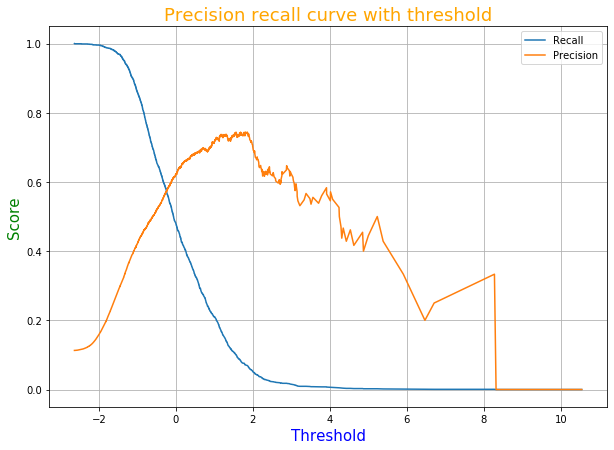

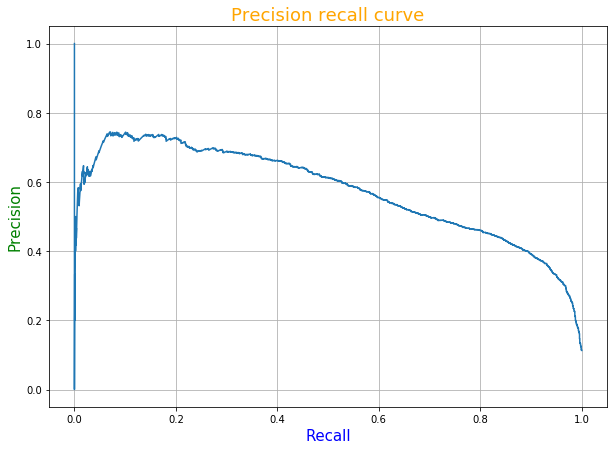

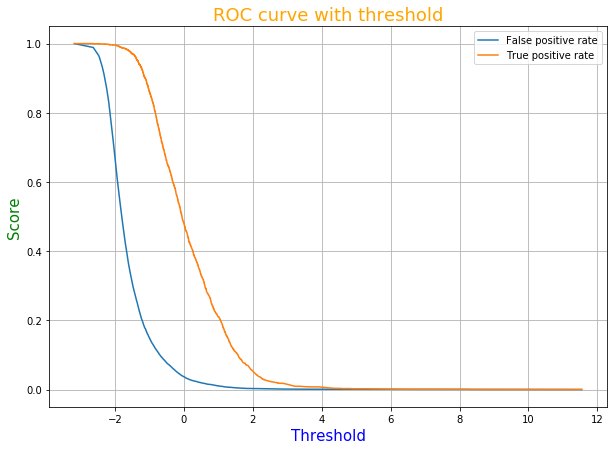

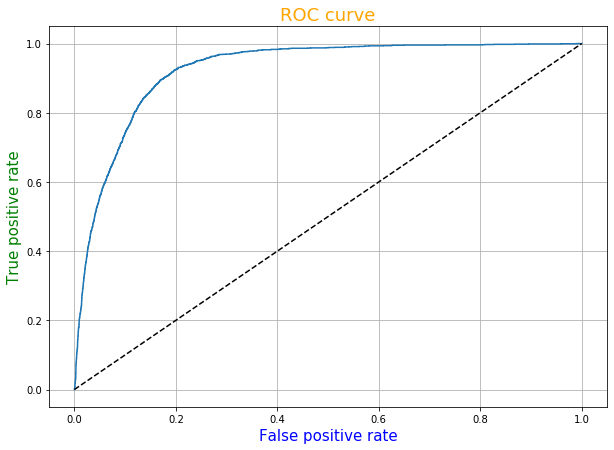

In [42]:
y_pred = sgd_clf.decision_function(X_test_scaled)
show_all_graphs(y_test, y_pred)

## LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log_reg = LogisticRegression(max_iter = 2000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
log_reg.score(X_test_scaled, y_test)

0.9082908472930323

In [46]:
log_reg = LogisticRegression()

params = dict(tol = [0.001, 0.0001], C = [2, 3, 5], max_iter = [1500, 1700, 2000, 2200])

grid_model = GridSearchCV(log_reg, param_grid= params, cv = 3)
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [2, 3, 5], 'max_iter': [1500, 1700, 2000, 2200],
                         'tol': [0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [47]:
grid_model.best_params_

{'C': 5, 'max_iter': 1500, 'tol': 0.001}

In [48]:
log_reg = LogisticRegression(**grid_model.best_params_)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

In [49]:
y_pred = log_reg.predict(X_test_scaled)
show_all_score(log_reg, y_test, y_pred)

### Accuracy score  : 0.9093226511289147

### Recall score    : 0.38707926167209555

### Precision score : 0.6614100185528757

### f1 score        : 0.48835616438356166

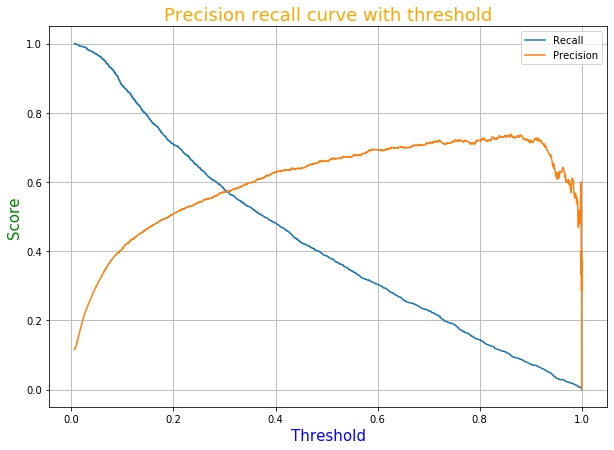

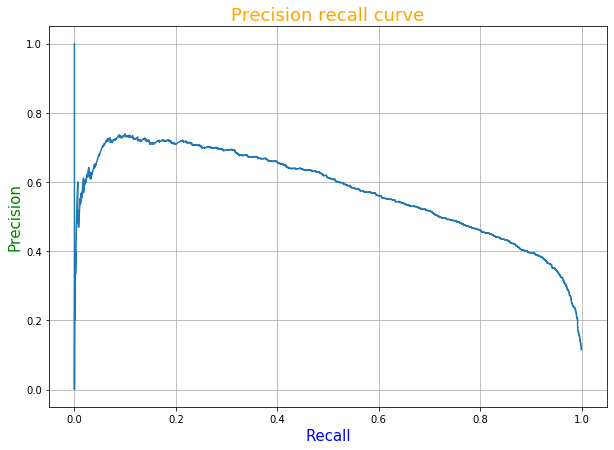

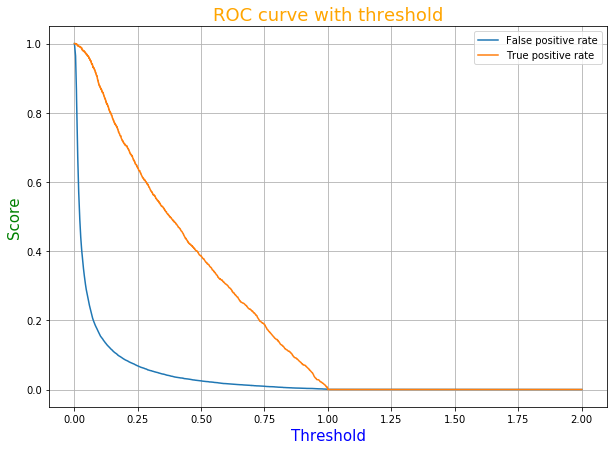

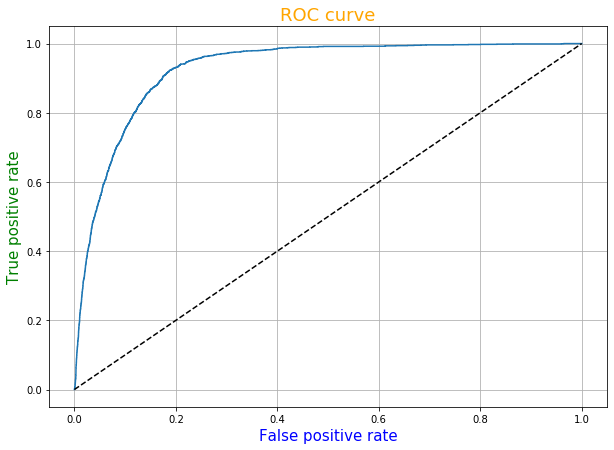

In [50]:
y_pred = log_reg.predict_proba(X_test_scaled)[:, 1]
show_all_graphs(y_test, y_pred)

## DecisionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

In [52]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
tree_clf.score(X_train, y_train)

1.0

In [54]:
tree_clf = DecisionTreeClassifier()

params = dict(max_depth = [10, 15, 20], max_leaf_nodes = [15, 20, 25], max_features = [16, 17, 18, 19])

grid_model = GridSearchCV(tree_clf, param_grid= params, cv = 3)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [10, 15, 20],
                         '

In [55]:
grid_model.best_params_

{'max_depth': 15, 'max_features': 16, 'max_leaf_nodes': 15}

In [56]:
tree_clf = DecisionTreeClassifier(**grid_model.best_params_)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=16, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

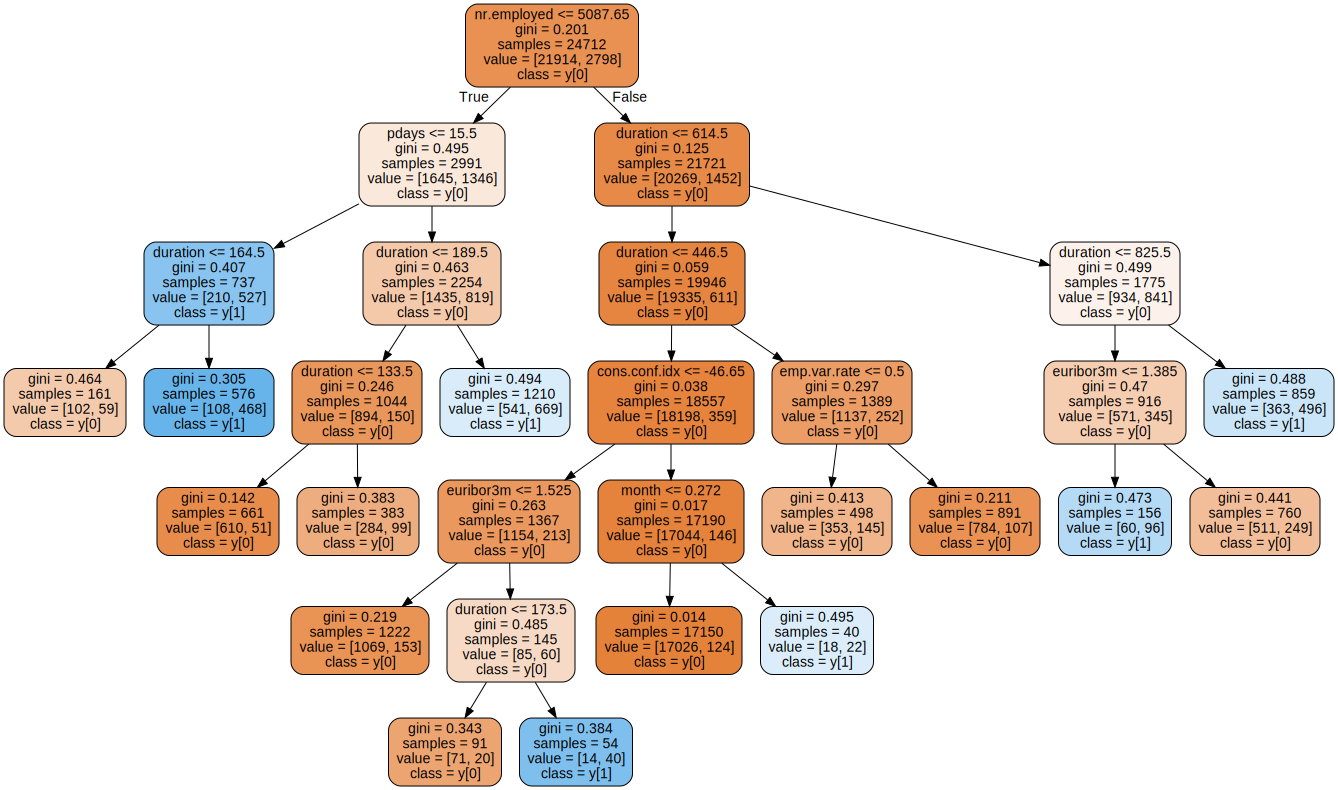

In [57]:
Source(export_graphviz(tree_clf, filled = True, rounded = True, class_names = True, feature_names = list(X_train)))

In [58]:
y_pred = tree_clf.predict(X_test)
show_all_score(tree_clf, y_test, y_pred)

### Accuracy score  : 0.9110827870842437

### Recall score    : 0.6150922909880565

### Precision score : 0.5997882477501324

### f1 score        : 0.6073438756365587

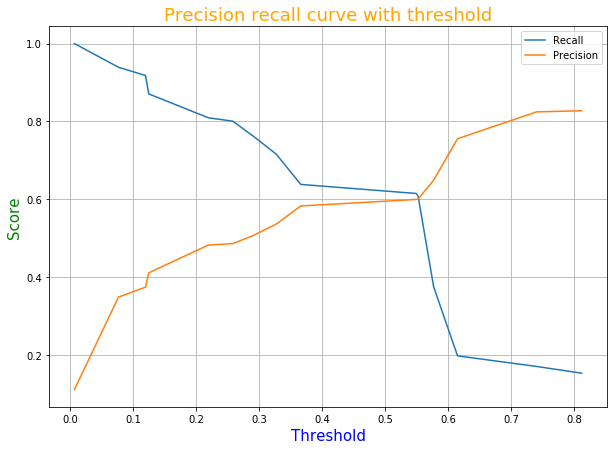

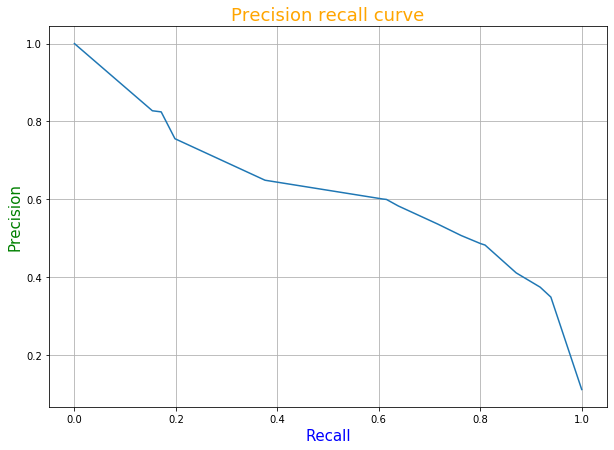

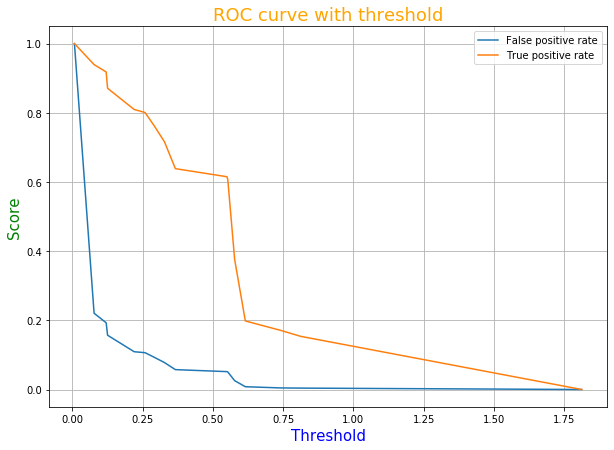

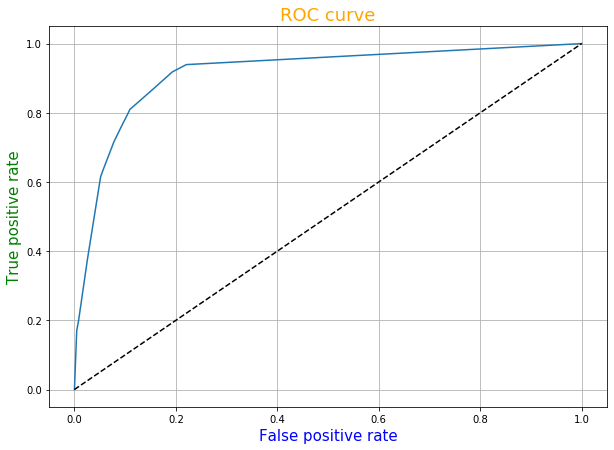

In [59]:
y_pred = tree_clf.predict_proba(X_test)[:, 1]
show_all_graphs(y_test, y_pred)

## SupportVectorMachine

In [60]:
from sklearn.svm import SVC

In [61]:
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
svm_clf.score(X_test_scaled, y_test)

0.9062272396212673

In [63]:
svm_clf = SVC()

params = dict(C = [3, 5, 8], degree = [1, 2, 3], tol = [0.01, 0.001, 0.0001])

grid_model = GridSearchCV(svm_clf, param_grid= params, cv = 3)
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [3, 5, 8], 'degree': [1, 2, 3],
                         'tol': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
grid_model.best_params_

{'C': 8, 'degree': 1, 'tol': 0.001}

In [65]:
svm_clf = SVC(**grid_model.best_params_)
svm_clf.fit(X_train_scaled, y_train)

SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
y_pred = svm_clf.predict(X_test_scaled)
show_all_score(svm_clf, y_test, y_pred)

### Accuracy score  : 0.9062879339645545

### Recall score    : 0.34473398479913137

### Precision score : 0.6532921810699589

### f1 score        : 0.4513148542999289

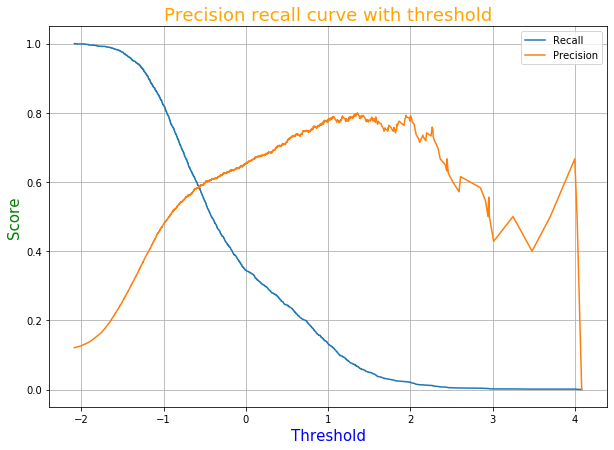

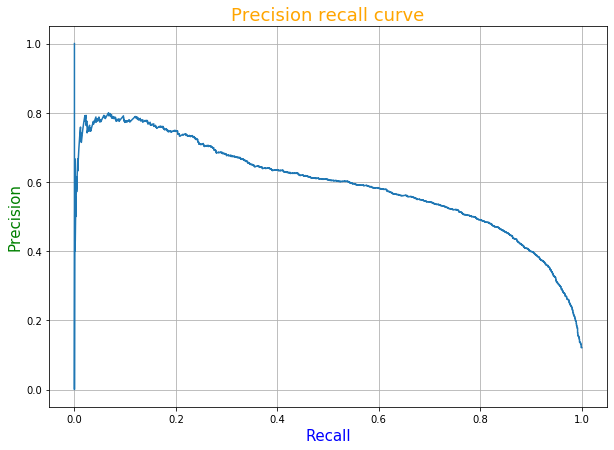

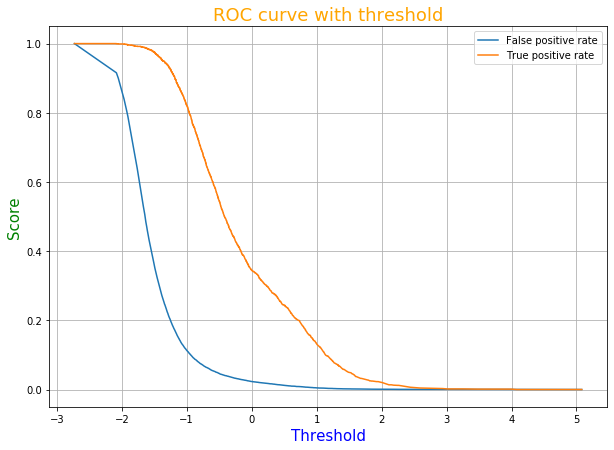

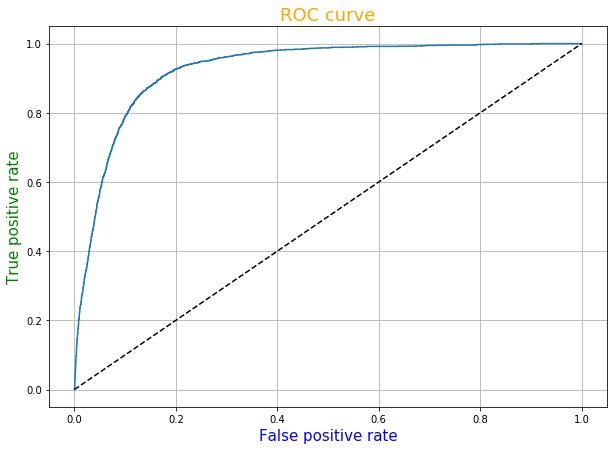

In [67]:
y_pred = svm_clf.decision_function(X_test_scaled)
show_all_graphs(y_test, y_pred)

## RandomForestClassifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
forest_clf.score(X_test, y_test)

0.9134498664724447

In [71]:
forest_clf = RandomForestClassifier()

params = dict(n_estimators = [50, 70, 100], max_depth = [14, 15, 16], max_leaf_nodes = [19, 20, 21], max_features = [16, 17, 18])

grid_model = GridSearchCV(forest_clf, param_grid= params, cv = 3)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [72]:
grid_model.best_params_

{'max_depth': 15, 'max_features': 18, 'max_leaf_nodes': 19, 'n_estimators': 50}

In [73]:
forest_clf = RandomForestClassifier(**grid_model.best_params_)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=18,
                       max_leaf_nodes=19, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
y_pred = forest_clf.predict(X_test)
show_all_score(forest_clf, y_test, y_pred)

### Accuracy score  : 0.9140568099053168

### Recall score    : 0.5678610206297503

### Precision score : 0.6278511404561825

### f1 score        : 0.5963511972633979

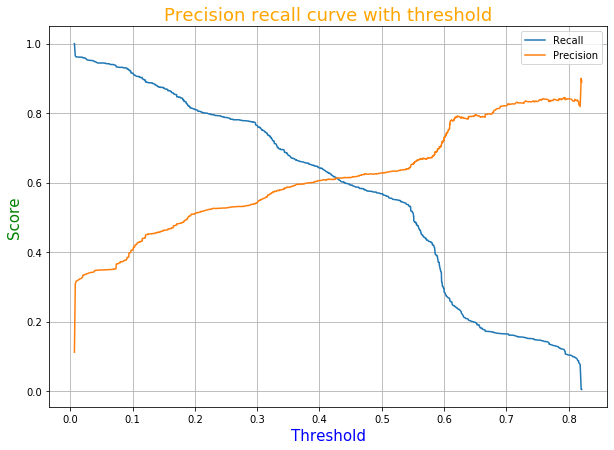

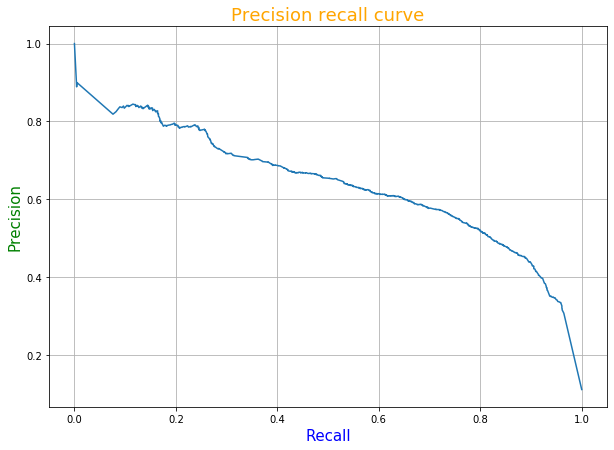

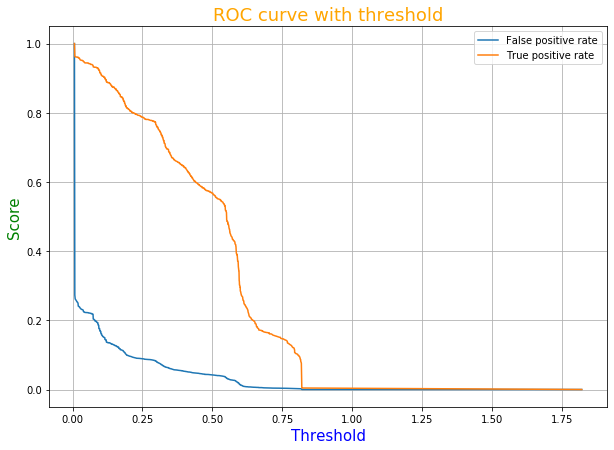

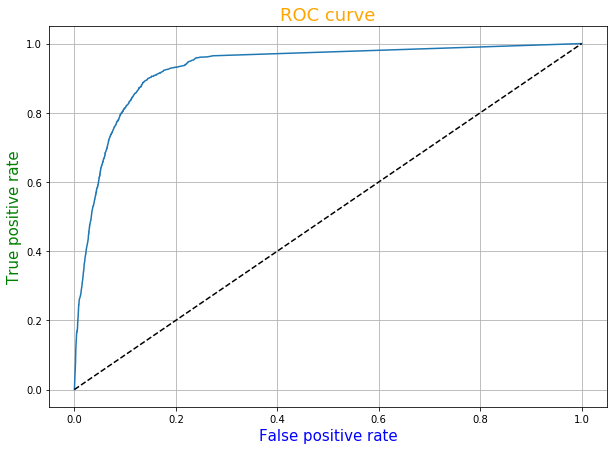

In [75]:
y_pred = forest_clf.predict_proba(X_test)[:, 1]
show_all_graphs(y_test, y_pred)

## ExtraTreesClassifier

In [76]:
from sklearn.ensemble import ExtraTreesClassifier

In [77]:
ext_tree = ExtraTreesClassifier()
ext_tree.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [78]:
ext_tree.score(X_test, y_test)

0.9074411264870114

In [79]:
ext_tree = ExtraTreesClassifier()

params = dict(n_estimators = [40, 50, 60], max_depth = [12, 13, 14], max_features = [16, 17, 18], max_leaf_nodes = [20, 21, 22])

grid_model = GridSearchCV(ext_tree, param_grid= params, cv = 3)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='deprecate

In [80]:
grid_model.best_params_

{'max_depth': 14, 'max_features': 18, 'max_leaf_nodes': 21, 'n_estimators': 60}

In [81]:
ext_tree = ExtraTreesClassifier(**grid_model.best_params_)
ext_tree.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=14, max_features=18,
                     max_leaf_nodes=21, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [82]:
y_pred = ext_tree.predict(X_test)
show_all_score(ext_tree, y_test, y_pred)

### Accuracy score  : 0.9074411264870114

### Recall score    : 0.30618892508143325

### Precision score : 0.6954377311960542

### f1 score        : 0.4251790425932907

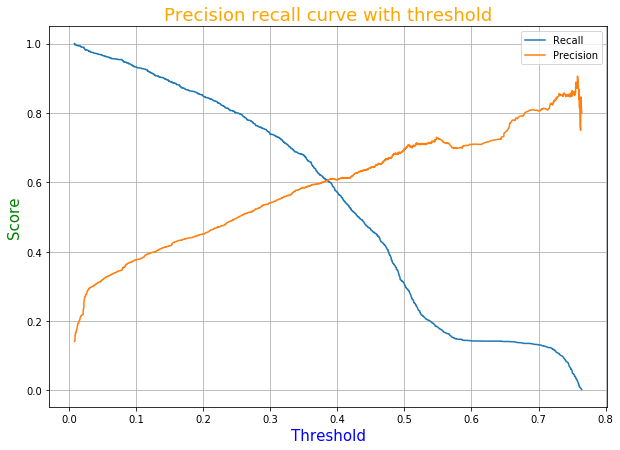

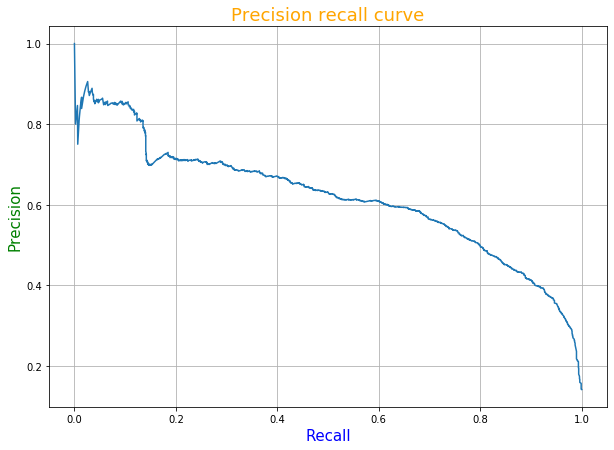

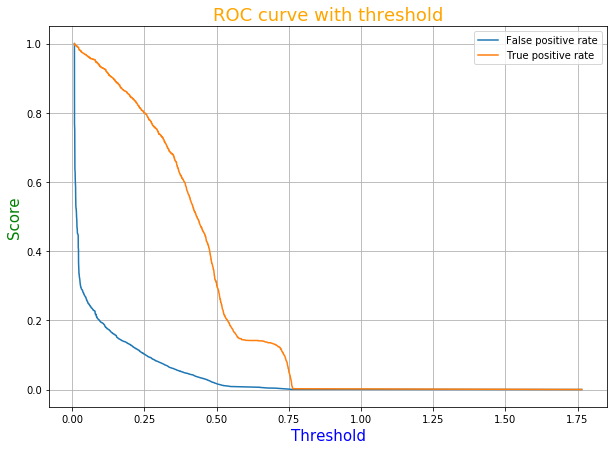

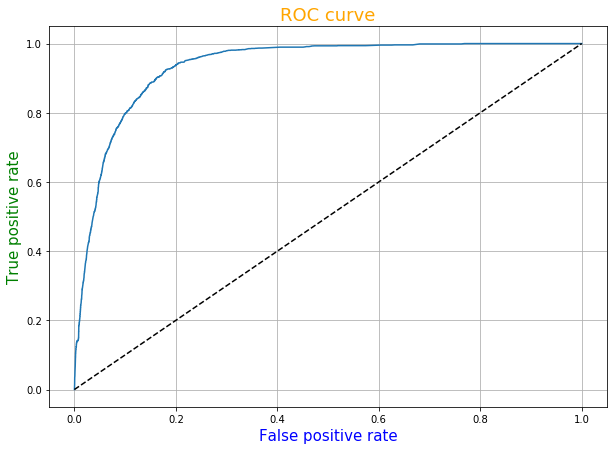

In [83]:
y_pred = ext_tree.predict_proba(X_test)[:, 1]
show_all_graphs(y_test, y_pred)

## AdaBoostClassifier

In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [86]:
ada_boost.score(X_test, y_test)

0.9078659868900218

In [88]:
ada_boost = AdaBoostClassifier()

params = dict(n_estimators = [55, 60, 65], learning_rate = [1, 0.1, 0.01, 0.001])

grid_model = GridSearchCV(ada_boost, param_grid= params, cv = 3)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.001],
                         'n_estimators': [55, 60, 65]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [89]:
grid_model.best_params_

{'learning_rate': 1, 'n_estimators': 60}

In [90]:
ada_boost = AdaBoostClassifier(**grid_model.best_params_)
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=60, random_state=None)

In [91]:
y_pred = ada_boost.predict(X_test)
show_all_score(ada_boost, y_test, y_pred)

### Accuracy score  : 0.9075018208302986

### Recall score    : 0.36156351791530944

### Precision score : 0.6568047337278107

### f1 score        : 0.46638655462184875

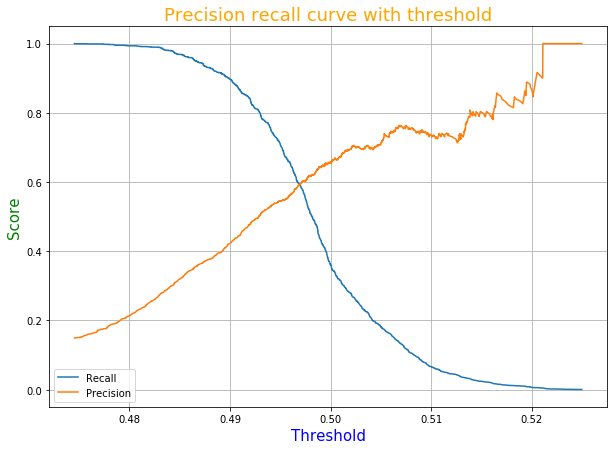

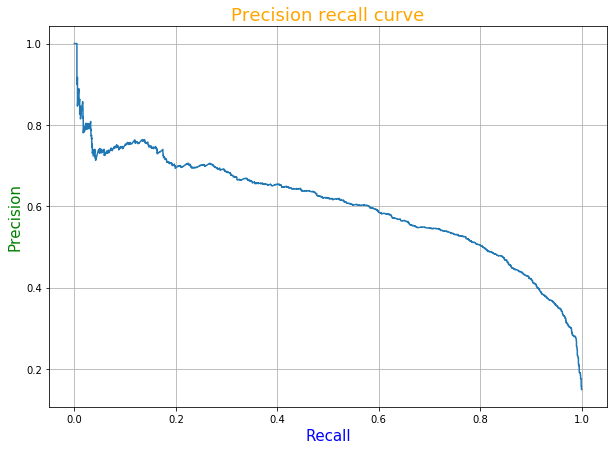

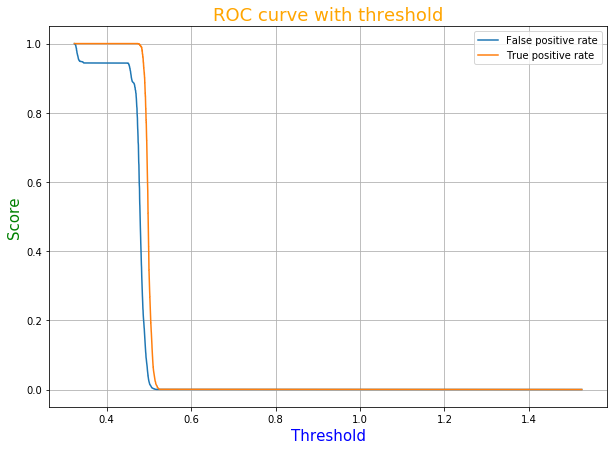

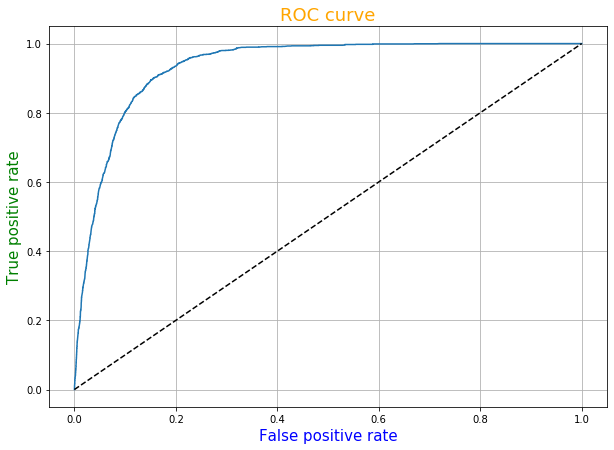

In [92]:
y_pred = ada_boost.predict_proba(X_test)[:, 1]
show_all_graphs(y_test, y_pred)

## GradientBoostingClassifier

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [95]:
grad_boost.score(X_test, y_test)

0.9153920854576354

In [97]:
grad_boost = GradientBoostingClassifier()

params = dict(learning_rate = [0.1, 0.01 , 0.001], n_estimators = [55, 60, 65], max_features = [17, 18, 19],
             max_depth = [12, 13, 14], max_leaf_nodes = [22, 23, 24])

grid_model = GridSearchCV(grad_boost, param_grid = params, cv = 3)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [98]:
grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 14,
 'max_features': 18,
 'max_leaf_nodes': 22,
 'n_estimators': 65}

In [99]:
grad_boost = GradientBoostingClassifier(**grid_model.best_params_)
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=14,
                           max_features=18, max_leaf_nodes=22,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=65,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [100]:
y_pred = grad_boost.predict(X_test)
show_all_score(grad_boost, y_test, y_pred)

### Accuracy score  : 0.9156348628307842

### Recall score    : 0.5293159609120521

### Precision score : 0.6508678237650201

### f1 score        : 0.5838323353293413

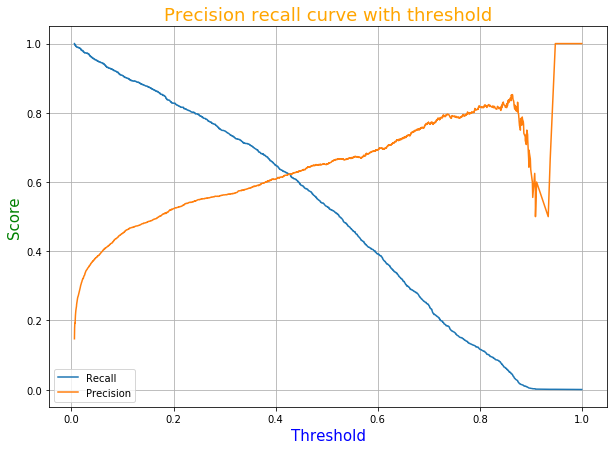

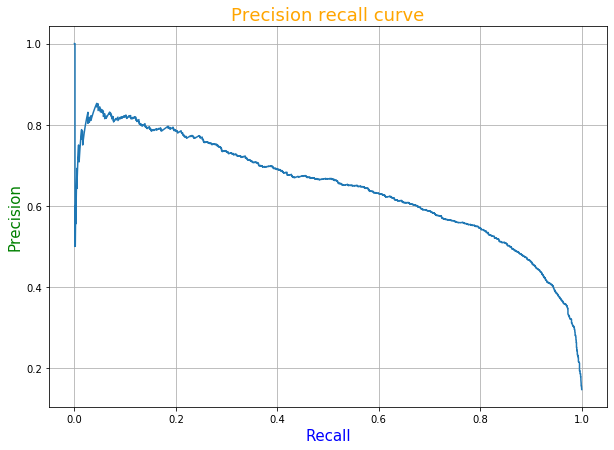

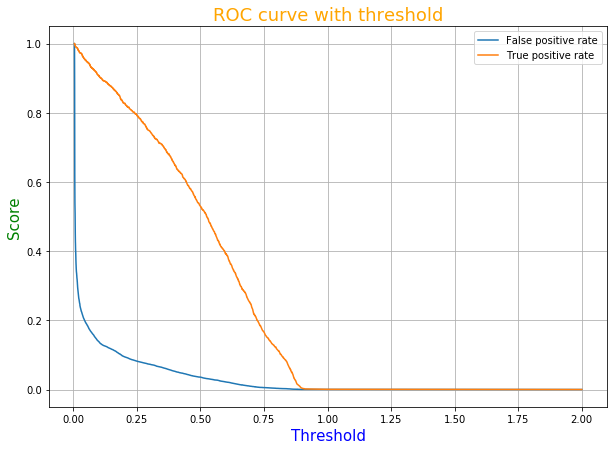

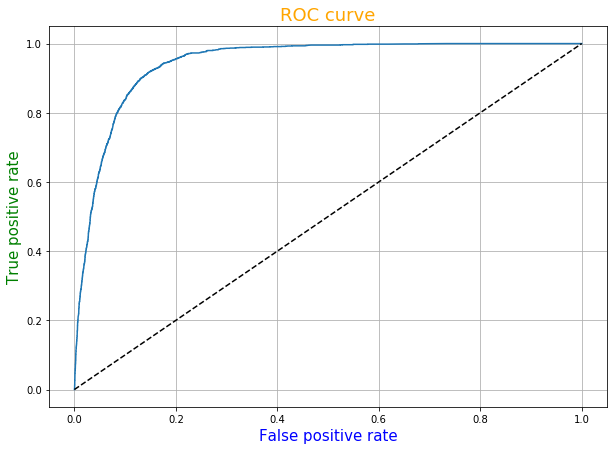

In [101]:
y_pred = grad_boost.predict_proba(X_test)[:, 1]
show_all_graphs(y_test, y_pred)

## SoftVotingClassifier

In [105]:
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone

In [150]:
clf_list = []

for clf in [sgd_clf, log_reg, tree_clf, svm_clf, forest_clf, ext_tree, ada_boost, grad_boost]:
    if clf.__class__.__name__ == 'SVC':
        clf.set_params(probability = True)
    clf_list.append((clf.__class__.__name__, clone(clf)))

clf_list

[('SGDClassifier',
  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
                l1_ratio=0.15, learning_rate='optimal', loss='hinge',
                max_iter=800, n_iter_no_change=5, n_jobs=None, penalty='l1',
                power_t=0.5, random_state=None, shuffle=True, tol=0.01,
                validation_fraction=0.1, verbose=0, warm_start=False)),
 ('LogisticRegression',
  LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=1500,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                     warm_start=False)),
 ('DecisionTreeClassifier',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=15, max_features=16, max_leaf_nodes=15,
     

In [186]:
soft_voting = VotingClassifier(clf_list[1:], voting = 'soft')
soft_voting.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(C=5, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1500,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.001,
                                                 verbose=0, warm_start=False)),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     c...
                                                         max_leaf_nodes=22,
                  

In [187]:
y_pred = soft_voting.predict(X_test_scaled)
show_all_score(soft_voting, y_test, y_pred)

### Accuracy score  : 0.9147851420247632

### Recall score    : 0.44842562432138977

### Precision score : 0.6803953871499177

### f1 score        : 0.5405759162303666

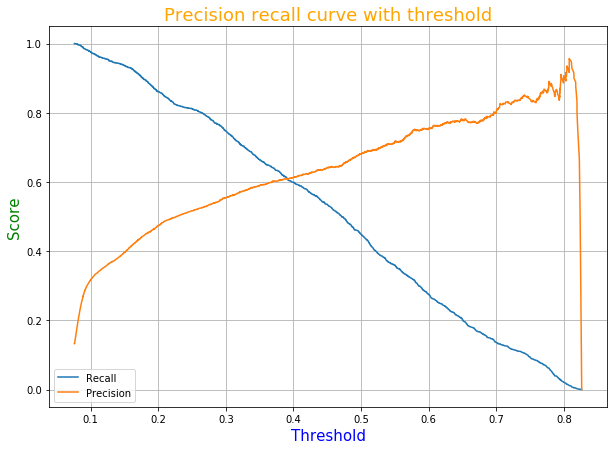

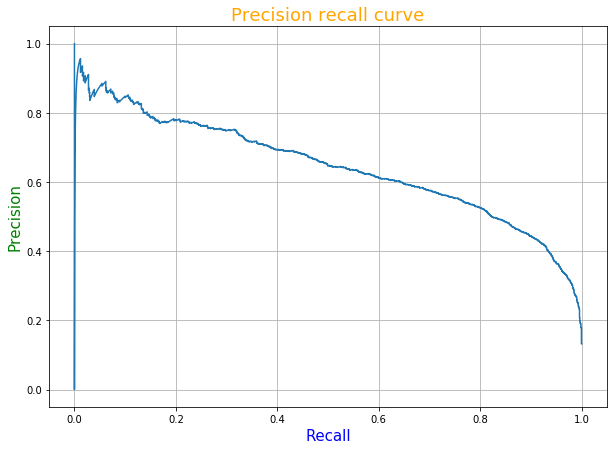

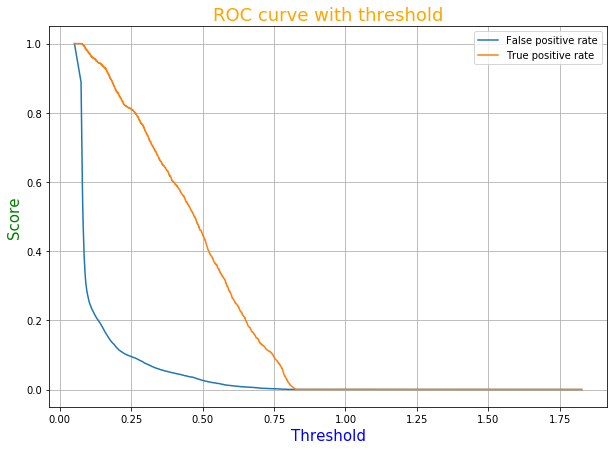

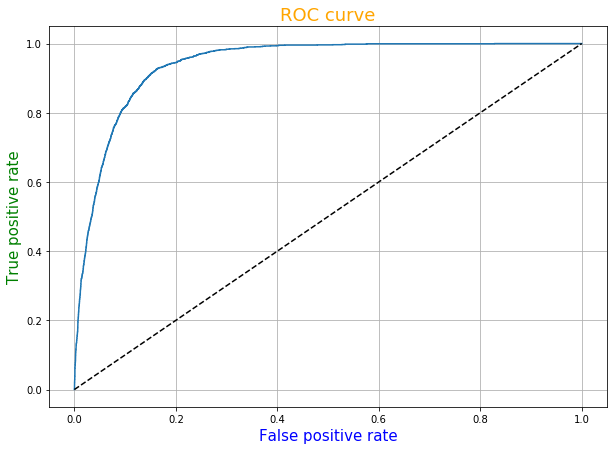

In [188]:
y_pred = soft_voting.predict_proba(X_test_scaled)[:, 1]
show_all_graphs(y_test, y_pred)

## HardVotingClassifier

In [189]:
hard_voting = VotingClassifier(clf_list, voting = 'hard')
hard_voting.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('SGDClassifier',
                              SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=800,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l1', power_t=0.5,
                                            random_state=None, shuffle=True,
                                            tol=0.01, validation_fraction=0.1,...
                                                         max_leaf_nodes=22,
                                                         min_impurity_decrease=0.

In [190]:
y_pred = hard_voting.predict(X_test_scaled)
show_all_score(hard_voting, y_test, y_pred)

### Accuracy score  : 0.9127215343529983

### Recall score    : 0.3751357220412595

### Precision score : 0.7065439672801636

### f1 score        : 0.49007092198581553

## Score Board

In [191]:
pd.DataFrame(score_board)

,clf,accuracy,recall,precision,f1
0,SGDClassifier,0.909262,0.480456,0.621926,0.542113
1,LogisticRegression,0.909323,0.387079,0.661410,0.488356
2,DecisionTreeClassifier,0.911083,0.615092,0.599788,0.607344
3,SVC,0.906288,0.344734,0.653292,0.451315
4,RandomForestClassifier,0.914057,0.567861,0.627851,0.596351
5,ExtraTreesClassifier,0.907441,0.306189,0.695438,0.425179
6,AdaBoostClassifier,0.907502,0.361564,0.656805,0.466387
7,GradientBoostingClassifier,0.915635,0.529316,0.650868,0.583832
8,VotingClassifier,0.914785,0.448426,0.680395,0.540576
9,VotingClassifier,0.912722,0.375136,0.706544,0.490071


In [104]:
import joblib

In [245]:
# encoders
joblib.dump(month_rank_map, filename = 'encoder_pickle/month_rank_map.pkl')
joblib.dump(day_rank_map, filename = 'encoder_pickle/day_rank_map.pkl')
joblib.dump(education_rank_map, filename = 'encoder_pickle/education_rank_map.pkl')
joblib.dump(marital_rank_map, filename = 'encoder_pickle/marital_rank_map.pkl')
joblib.dump(job_rank_map, filename = 'encoder_pickle/job_rank_map.pkl')
joblib.dump(contact_rank_map, filename = 'encoder_pickle/contact_rank_map.pkl')
joblib.dump(default_enc, filename = 'encoder_pickle/default_enc.pkl')
joblib.dump(housing_enc, filename = 'encoder_pickle/housing_enc.pkl')
joblib.dump(poutcome_enc, filename = 'encoder_pickle/poutcome_enc.pkl')

# classifiers
joblib.dump(sgd_clf, filename='classifiers_pickle/sgd_clf.pkl')
joblib.dump(log_reg, filename='classifiers_pickle/log_reg.pkl')
joblib.dump(tree_clf, filename='classifiers_pickle/tree_clf.pkl')
joblib.dump(svm_clf, filename='classifiers_pickle/svm_clf.pkl')
joblib.dump(forest_clf, filename='classifiers_pickle/forest_clf.pkl')
joblib.dump(ext_tree, filename='classifiers_pickle/ext_tree.pkl')
joblib.dump(ada_boost, filename='classifiers_pickle/ada_boost.pkl')
joblib.dump(grad_boost, filename='classifiers_pickle/grad_boost.pkl')
joblib.dump(soft_voting, filename='classifiers_pickle/soft_voting.pkl')
joblib.dump(hard_voting, filename='classifiers_pickle/hard_voting.pkl')

['classifiers_pickle/hard_voting.pkl']

## Final output

In [246]:
def prepare_data(input_df):
    input_df.drop('loan', axis = 1, inplace = True)
    
    month_rank_map = joblib.load('encoder_pickle/month_rank_map.pkl')
    day_rank_map = joblib.load('encoder_pickle/day_rank_map.pkl')
    education_rank_map = joblib.load('encoder_pickle/education_rank_map.pkl')
    marital_rank_map = joblib.load('encoder_pickle/marital_rank_map.pkl')
    job_rank_map = joblib.load('encoder_pickle/job_rank_map.pkl')
    contact_rank_map = joblib.load('encoder_pickle/contact_rank_map.pkl')

    input_df['month'] = input_df['month'].map(month_rank_map)
    input_df['day_of_week'] = input_df['day_of_week'].map(day_rank_map)
    input_df['education'] = input_df['education'].map(education_rank_map)
    input_df['marital'] = input_df['marital'].map(marital_rank_map)
    input_df['job'] = input_df['job'].map(job_rank_map)
    input_df['contact'] = input_df['contact'].map(contact_rank_map)
    
    default_enc = joblib.load('encoder_pickle/default_enc.pkl')
    housing_enc = joblib.load('encoder_pickle/housing_enc.pkl')
    poutcome_enc = joblib.load('encoder_pickle/poutcome_enc.pkl')
    
    input_df['default'] = default_enc.fit_transform(input_df['default'])
    input_df['housing'] = housing_enc.fit_transform(input_df['housing'])
    input_df['poutcome'] = poutcome_enc.fit_transform(input_df['poutcome'])
    
    return input_df

In [259]:
# testing
test_df = pd.read_csv('bank-additional-full.csv', sep = ';')

test_X = test_df.drop('y', axis = 1)
test_y = test_df['y']

In [260]:
test_y = test_y.map({'yes': 1, 'no': 0})
test_y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [261]:
test_X = prepare_data(test_X)
test_X.head()

,age,job,marital,education,default,housing,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,0.100000,0.101573,0.102490,0,0,0.052313,0.064347,0.099483,261,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
1,57,0.081381,0.101573,0.108355,-1,0,0.052313,0.064347,0.099483,149,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
2,37,0.081381,0.101573,0.108355,0,1,0.052313,0.064347,0.099483,226,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
3,40,0.129726,0.101573,0.082024,0,0,0.052313,0.064347,0.099483,151,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
4,56,0.081381,0.101573,0.108355,0,0,0.052313,0.064347,0.099483,307,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0


In [262]:
clf_ = joblib.load('classifiers_pickle/grad_boost.pkl')

In [263]:
clf_.score(test_X, test_y)

0.92823152374478